# Этап 1. Получение данных

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка файла в переменную df

In [33]:
df = pd.read_csv('train.csv')

Общая информация о данных из таблицы df

In [34]:
df.shape

(891, 12)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Этап 2. Предобработка данных

Исключим пропуски, удалим неинформативные столбцы

Проверим наличие пропусков в df, используя heatmap для наглядности

<Axes: >

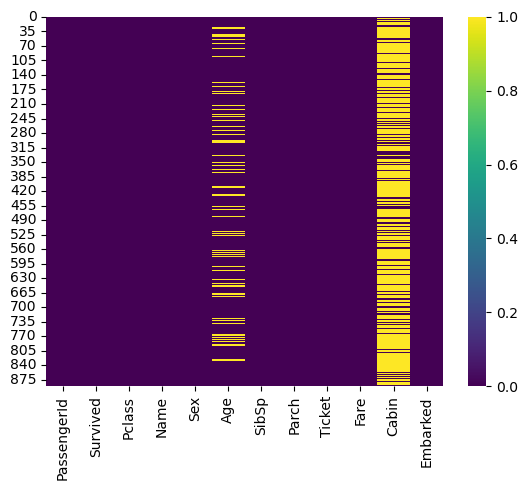

In [37]:
sns.heatmap(df.isnull(), cmap='viridis')

Составим процентный список пропущенных значений для того, чтобы узнать долю пропусков в каждом из столбцов

In [38]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing * 100)))

PassengerId - 0%
Survived - 0%
Pclass - 0%
Name - 0%
Sex - 0%
Age - 20%
SibSp - 0%
Parch - 0%
Ticket - 0%
Fare - 0%
Cabin - 77%
Embarked - 0%


Столбец Cabin имеет больше 50% пропусков и не несет в себе информативную ценность на данном этапе исследования, поэтому удаляем его

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Удаляем неинформативные столбцы

In [40]:
df.drop(['PassengerId', 'Ticket','Cabin','Embarked'],axis=1,inplace=True)

Заполняем пропуски в столбце Age

Для заполнения пропусков используем среднее значение возраста пассажиров в зависимости от их класса билета

In [41]:
df[['Pclass','Age']].groupby(by=['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


<Axes: xlabel='Pclass', ylabel='Age'>

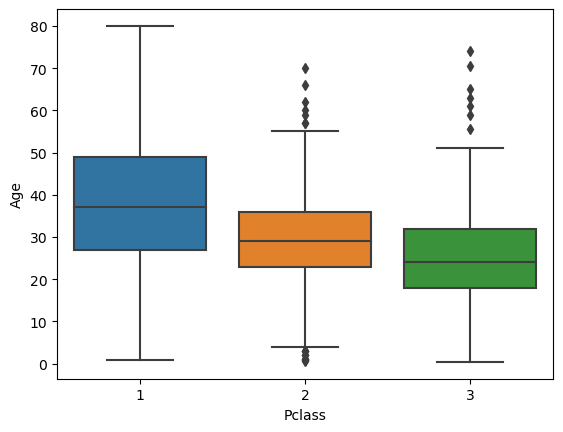

In [42]:
sns.boxplot(data=df, x="Pclass", y="Age")

In [45]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [46]:
df['Age'] = df[['Age', 'Pclass']].apply(fill_age, axis=1)

Проверяем наличие пропусков после их заполнения

<Axes: >

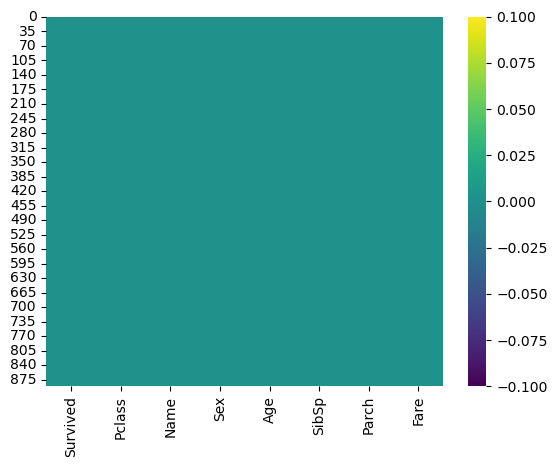

In [48]:
sns.heatmap(df.isnull(), cmap='viridis')

In [49]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


# У кого было больше шансов выжить?

Проверим соотношение выживших и невыживших пассажиров 

<Axes: xlabel='Survived', ylabel='count'>

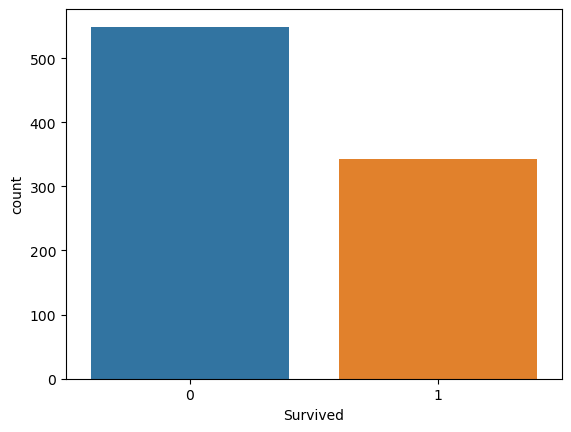

In [50]:
sns.countplot(data=df, x='Survived')

Для дальнейших рассуждений добавим разбивку по мужчинам и женщинам

<Axes: xlabel='Survived', ylabel='count'>

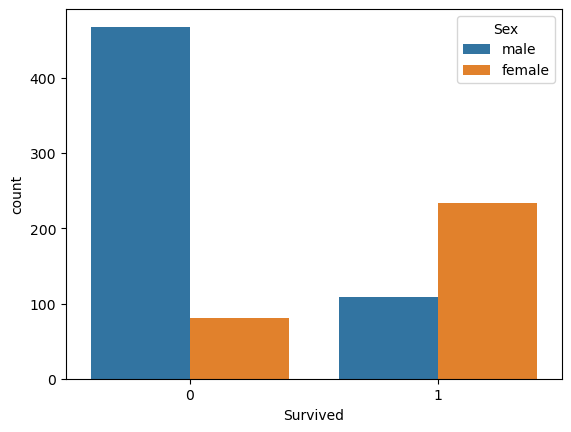

In [51]:
sns.countplot(data=df, x='Survived', hue='Sex')

По графику видно, что среди невыжиших больше мужчин

Рассмотрим более детально пассажиров мужчин и сделаем разбивку по классу билета

In [52]:
male = df[df['Sex'] == 'male']

<Axes: xlabel='Survived', ylabel='count'>

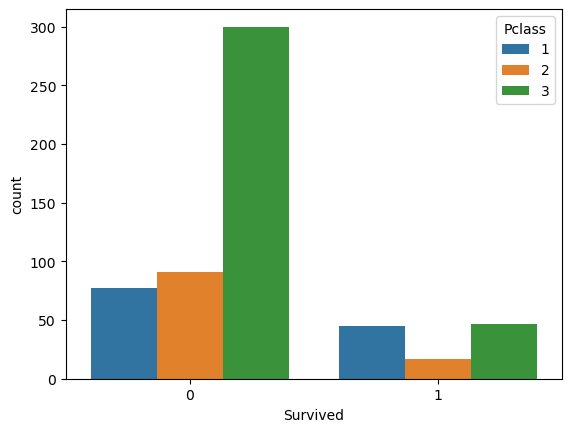

In [56]:
sns.countplot(data=male, x='Survived', hue='Pclass')

Рассмотрим возраст выживших и невыживших пассажиров

<Axes: xlabel='Age', ylabel='Count'>

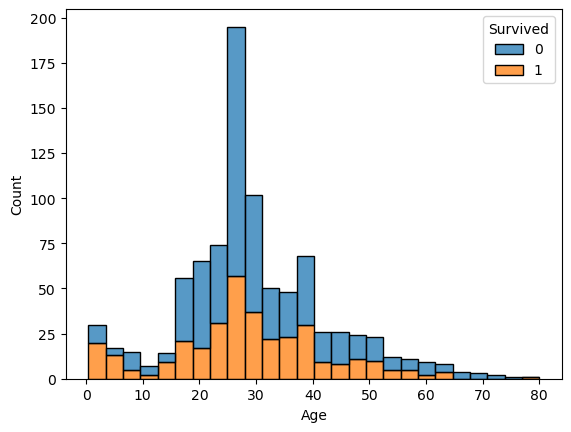

In [58]:
sns.histplot(data=df, x='Age', hue='Survived', multiple="stack")

<Axes: xlabel='Age', ylabel='Count'>

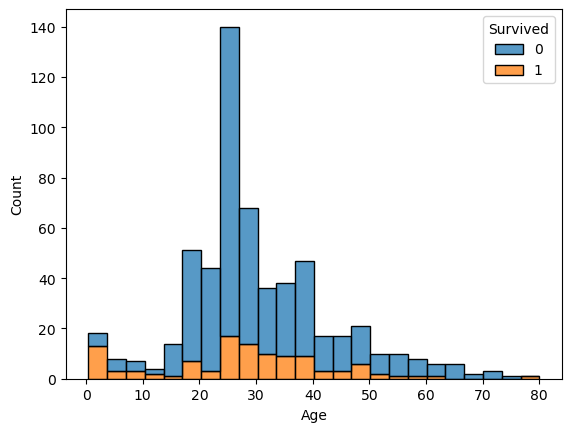

In [59]:
sns.histplot(data=male, x='Age', hue='Survived', multiple="stack")

Проведем теже этапы с данными о пассажирах женщинах

In [60]:
female = df[df['Sex'] == 'female']

<Axes: xlabel='Age', ylabel='Count'>

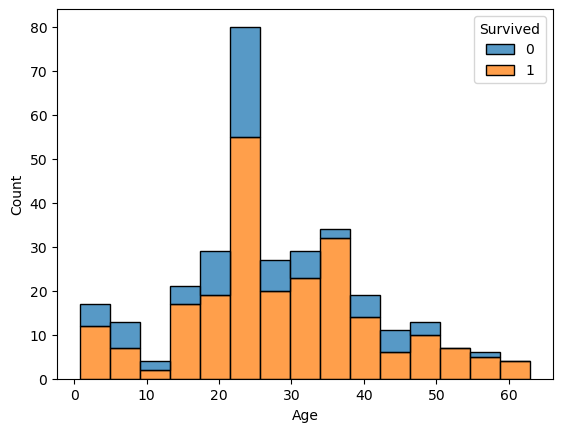

In [61]:
sns.histplot(data=female, x='Age', hue='Survived', multiple="stack")

<Axes: xlabel='Survived', ylabel='count'>

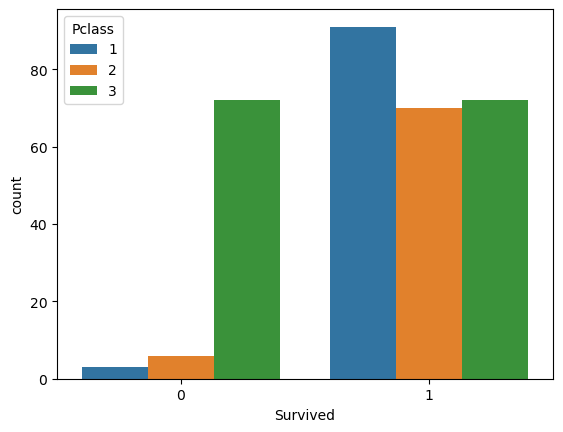

In [63]:
sns.countplot(data=female, x='Survived', hue='Pclass')

# Вывод

После рассмотрения графиков и проведения анализа можно предположить, что больше шансов выжить было у женщин вне зависимости от класса билета, так как среди третьего класса также много женщин выжило. Рассматривая тенденцию выживания в целом среди пассажиров, то можно рассуждать о том, что больше шансов было у людей, у которых был билет более высокого класса. 